<h1>BSP412 - PuLP example</h1>

<p>In the other notebook we learned how to graph the feasible region and the objective function for the LP problem. This is all displayed in the cell below.</p>

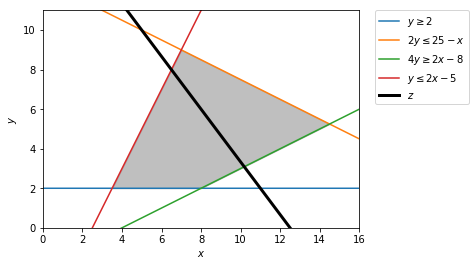

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Objective function line z=4x+3y at z = 50
yz = (50-4*x)/3

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.plot(x, yz, label=r'$z$', linewidth=3, color='k')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<h1>Solve the problem using Python LP-package PuLP</h1>

<p>We first import the pulp package to our session. This needs to be done so that Python knows which functions we want to call.</p>

In [4]:
# http://benalexkeen.com/linear-programming-with-python-and-pulp-part-2/
import pulp

<p>We shall then define the LP-problem for PuLP such that it knows what we want to do. This is quite straightforward. First we will declare it by giving it a name and whether we want to maximize or minimize. (Note: PuLP uses the American English term "maximize" rather than the British English "maximise".)</p>

In [9]:
my_lp_problem = pulp.LpProblem("Acme Corporation profit maximization problem", pulp.LpMaximize)


<p>Then we tell PuLP what are the decision variables. We can give them lower bounds, upper bounds, and tell whether they are continuous or discrete.</p>

In [10]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

<p>PuLP also wants to know what are the objective function and the constraints. Note two conventions: 1) add "Z" after the expression of the objective function; 2) use "+=" when adding the expressions</p>

In [11]:
# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

# Constraints
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem += y <= 2 * x - 5

<p>Then we can call our declaration to see what the problem looks like.</p>

In [12]:
my_lp_problem

Acme Corporation profit maximization problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

<p>After all this, solving the problem is easy for us, we just call PuLP's solve() function.</p>

In [13]:
my_lp_problem.solve()

1

<p>As this does not return anything meaningful, we can use PuLP to tell us whether it found an optimal solution. This is not a function but a dictionary object, as the square brackets indicate.</p>

In [16]:
pulp.LpStatus[my_lp_problem.status]

'Optimal'

<p>This is how we can see what are the optimal values of the decision variables.</p>

In [24]:
[x.varValue,y.varValue]

[14.5, 5.25]

<p>We can also use PuLP's value() function to tell what is the objective function value at the optimal values of the decision variables.</p>

In [18]:
pulp.value(my_lp_problem.objective)

73.75

<h1>Resourcing problem</h1>

In [17]:
# Instantiate our problem class
model = pulp.LpProblem("Profit maximising problem", pulp.LpMaximize)
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

# Objective function
model += 30000 * A + 45000 * B, "Profit"

# Constraints
model += 3 * A + 4 * B <= 30
model += 5 * A + 6 * B <= 60
model += 1.5 * A + 3 * B <= 21

# Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [21]:
# Print our decision variable values
A.varValue

2.0

In [20]:
B.varValue

6.0

In [22]:
pulp.value(model.objective)

330000.0